# Data Structure
Data is parsed and grouped together by gidx which is the gaze index and is common for one gaze

Other variables are

- 'ts' : time stamp 
- 'pcl': pupil center (left eye)
- 'pcr': pupil center (right eye)
- 'pdl': pupil diameter (left eye)
- 'pdr': pupil diameter (right eye)
- 'gdl': gaze direction (left eye)
- 'gdr': gaze direction (right eye)
- 'gp': gaze position 
- 'gp3': gaze position in 3D


In [7]:
import json
import matplotlib.pyplot as plt

In [8]:
def read_eye_tracking_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    eye_tracking_data = []

    for line in lines:
        data = json.loads(line)
        eye_tracking_data.append(data)

    return eye_tracking_data

def parse_data(eye_tracking_data):
    # Grouping data by 'gidx' and organizing it 
    grouped_data = {}

    for data in eye_tracking_data:
        gidx = data.get('gidx')

        if gidx is not None:
            if gidx not in grouped_data:
                grouped_data[gidx] = {
                    'ts' :None,
                    'pcl':None,
                    'pcr':None,
                    'pdl': None,
                    'pdr': None,
                    'gdl': None,
                    'gdr': None,
                    'gp':None,
                    'gp3': None
                }

            # Extracting pupil diameter for left and right eyes
            ts_data = data.get('ts',None)
            grouped_data[gidx]['ts'] = ts_data
            pc_data = data.get('pc',None)
            pd_data = data.get('pd', None)
            gd_data = data.get('gd',None)
            gp_data = data.get('gp',None)
            gp3_data = data.get('gp3',None)
            eye = data.get('eye',None)

            if pc_data is not None:
                if eye =='left':
                    grouped_data[gidx]['pcl'] = pc_data
                elif eye =='right':
                    grouped_data[gidx]['pcr'] = pc_data 

            if pd_data is not None:
                if eye =='left':
                    grouped_data[gidx]['pdl'] = pd_data
                elif eye =='right':
                    grouped_data[gidx]['pdr'] = pd_data 

            if gd_data is not None:
                if eye =='left':
                    grouped_data[gidx]['gdl'] = gd_data
                elif eye =='right':
                    grouped_data[gidx]['gdr'] = gd_data
            if gp_data is not None:
                grouped_data[gidx]['gp'] = gp_data
            if gp3_data is not None:
                grouped_data[gidx]['gp3'] = gp3_data
    return grouped_data

def print_data(grouped_data):
    for gidx, data_dict in grouped_data.items():
        print(f"Group with gidx={gidx}:")
        print(f"  pcl: {data_dict['pcl']}")
        print(f"  pcr: {data_dict['pcr']}")
        print(f"  pdl: {data_dict['pdl']}")
        print(f"  pdr: {data_dict['pdr']}")
        print(f"  gdl: {data_dict['gdl']}")
        print(f"  gdl: {data_dict['gdl']}")
        print(f"  gp: {data_dict['gp']}")
        print(f"  gp3: {data_dict['gp3']}")
        print("\n")

In [9]:
file_path = 'livedata.json'
eye_tracking_data = read_eye_tracking_data(file_path)
grouped_data = parse_data(eye_tracking_data)
# print_data(grouped_data)

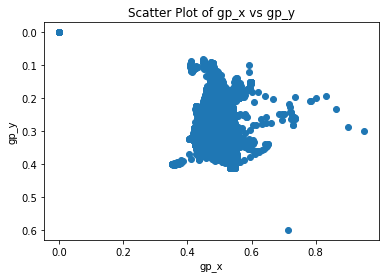

In [10]:
# Extracting data for plotting
gp_values = [[data_dict['gp'][0] for data_dict in grouped_data.values()],
              [data_dict['gp'][1] for data_dict in grouped_data.values()]]

# Plotting
plt.scatter(gp_values[0], gp_values[1])
plt.gca().invert_yaxis()
plt.xlabel('gp_x')
plt.ylabel('gp_y')
plt.title('Scatter Plot of gp_x vs gp_y')
plt.show()

In [13]:
print(len(grouped_data))

12777


In [33]:
# print_data(grouped_data)

Group with gidx=52287:
  pcl: [33.52, -23.96, -31.1]
  pcr: [-31.09, -21.87, -31.18]
  pdl: 3.37
  pdr: 3.12
  gdl: [0.0173, 0.2178, 0.9758]
  gdl: [0.0173, 0.2178, 0.9758]
  gp: [0.4652, 0.2954]
  gp3: [46.52, 155.66, 805.43]


Group with gidx=52288:
  pcl: [33.58, -23.83, -31.2]
  pcr: [-31.01, -22.03, -31.18]
  pdl: 3.36
  pdr: 3.09
  gdl: [0.0181, 0.2207, 0.9752]
  gdl: [0.0181, 0.2207, 0.9752]
  gp: [0.4654, 0.2948]
  gp3: [46.03, 155.32, 801.04]


Group with gidx=52289:
  pcl: [33.52, -23.96, -31.1]
  pcr: [-31.09, -21.86, -31.18]
  pdl: 3.37
  pdr: 3.13
  gdl: [0.0167, 0.2197, 0.9754]
  gdl: [0.0167, 0.2197, 0.9754]
  gp: [0.4654, 0.2937]
  gp3: [45.75, 154.86, 794.67]


Group with gidx=52290:
  pcl: [33.57, -23.83, -31.2]
  pcr: [-31.01, -22.03, -31.18]
  pdl: 3.37
  pdr: 3.11
  gdl: [0.0176, 0.2218, 0.9749]
  gdl: [0.0176, 0.2218, 0.9749]
  gp: [0.4654, 0.2933]
  gp3: [45.66, 154.77, 792.75]


Group with gidx=52291:
  pcl: [33.52, -23.96, -31.1]
  pcr: [-31.09, -21.86, -31.18]

In [41]:
# Function to map gaze positions to pixel coordinates
def map_gaze_to_pixels(gaze_position, frame_width, frame_height):
    if gaze_position is not None:
        x, y = gaze_position
        mapped_x = int(x * frame_width)
        mapped_y = int(y * frame_height)
        return mapped_x, mapped_y
    return None

def overlay_gaze_on_frame(frame, gaze_position):
    if gaze_position is not None:
        x, y = gaze_position
        if x !=0 and y!=0:
            cv2.circle(frame, (int(x), int(y)), 10, (0, 0, 255), -1)  # Red color, larger radius
    return frame

# Video file path
video_file_path = 'fullstream.mp4'
eye_tracking_file_path = 'livedata.json'  # Replace with the actual gaze data file

# Read video frames
cap = cv2.VideoCapture(video_file_path)
if not cap.isOpened():
    print("Error: Couldn't open the video file.")
else:
    # Read gaze data
    eye_tracking_data = read_eye_tracking_data(eye_tracking_file_path)
    grouped_data = parse_data(eye_tracking_data)

    # Get video details
    width  = int(cap.get(3))
    height = int(cap.get(4))
    fps    = cap.get(5)

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter('output_video1.mp4', fourcc, fps, (width, height))

    first_gidx = next(iter(grouped_data), None)
    # Process video frames
    for frame_count in range(int(cap.get(7))):  # Total number of frames
        ret, frame = cap.read()

        # Break the loop if the video has ended
        if not ret:
            break

            
        # Check if gaze data is available for the current frame
        des_gidx = frame_count*4 + first_gidx  # Assuming frame_count starts from 1
        for  i in range(4):
            gaze_position = grouped_data[des_gidx+i]['gp']
            print(f'gidx:{des_gidx}, frame_count:{frame_count}, gaze_position:{gaze_position}')

            # Map gaze point to pixel coordinates
            mapped_gaze_position = map_gaze_to_pixels(gaze_position, width, height)

            # Overlay mapped gaze point on the frame
            frame_with_gaze = overlay_gaze_on_frame(frame.copy(), mapped_gaze_position)

            # Write the frame to the output video
            out.write(frame_with_gaze)

    # Release the video capture and writer objects
    cap.release()
    out.release()

    # Close all windows
    cv2.destroyAllWindows()

    print("Output video saved as 'output_video.mp4'")

gidx:52287, frame_count:0, gaze_position:[0.4652, 0.2954]
gidx:52287, frame_count:0, gaze_position:[0.4654, 0.2948]
gidx:52287, frame_count:0, gaze_position:[0.4654, 0.2937]
gidx:52287, frame_count:0, gaze_position:[0.4654, 0.2933]
gidx:52291, frame_count:1, gaze_position:[0.4654, 0.2916]
gidx:52291, frame_count:1, gaze_position:[0.4654, 0.288]
gidx:52291, frame_count:1, gaze_position:[0.4655, 0.2867]
gidx:52291, frame_count:1, gaze_position:[0.4656, 0.2854]
gidx:52295, frame_count:2, gaze_position:[0.4656, 0.2847]
gidx:52295, frame_count:2, gaze_position:[0.4656, 0.2844]
gidx:52295, frame_count:2, gaze_position:[0.4657, 0.2834]
gidx:52295, frame_count:2, gaze_position:[0.4658, 0.282]
gidx:52299, frame_count:3, gaze_position:[0.4657, 0.2822]
gidx:52299, frame_count:3, gaze_position:[0.4656, 0.2825]
gidx:52299, frame_count:3, gaze_position:[0.4654, 0.2816]
gidx:52299, frame_count:3, gaze_position:[0.4652, 0.2815]
gidx:52303, frame_count:4, gaze_position:[0.4652, 0.2801]
gidx:52303, fram

In [42]:
# Function to map gaze positions to pixel coordinates
def map_gaze_to_pixels(gaze_position, frame_width, frame_height):
    if gaze_position is not None:
        x, y = gaze_position
        mapped_x = int(x * frame_width)
        mapped_y = int(y * frame_height)
        return mapped_x, mapped_y
    return None

def overlay_gaze_on_frame(frame, des_gidx,grouped_data):
    for i in range(4):
        gaze_position = grouped_data[des_gidx+i]['gp']
        print(f'gidx:{des_gidx}, frame_count:{frame_count}, gaze_position:{gaze_position}')

        # Map gaze point to pixel coordinates
        mapped_gaze_position = map_gaze_to_pixels(gaze_position, width, height)
        if mapped_gaze_position is not None:
            x, y = mapped_gaze_position
            if x !=0 and y!=0:
                cv2.circle(frame, (int(x), int(y)), 10, (0, 0, 255), -1)  # Red color, larger radius
    return frame

# Video file path
video_file_path = 'fullstream.mp4'
eye_tracking_file_path = 'livedata.json'  # Replace with the actual gaze data file

# Read video frames
cap = cv2.VideoCapture(video_file_path)
if not cap.isOpened():
    print("Error: Couldn't open the video file.")
else:
    # Read gaze data
    eye_tracking_data = read_eye_tracking_data(eye_tracking_file_path)
    grouped_data = parse_data(eye_tracking_data)

    # Get video details
    width  = int(cap.get(3))
    height = int(cap.get(4))
    fps    = cap.get(5)

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter('output_video2.mp4', fourcc, fps, (width, height))

    first_gidx = next(iter(grouped_data), None)
    # Process video frames
    for frame_count in range(int(cap.get(7))):  # Total number of frames
        ret, frame = cap.read()

        # Break the loop if the video has ended
        if not ret:
            break

            
        # Check if gaze data is available for the current frame
        des_gidx = frame_count*4 + first_gidx  # Assuming frame_count starts from 1

        # Overlay mapped gaze point on the frame
        frame_with_gaze = overlay_gaze_on_frame(frame.copy(),des_gidx,grouped_data)

        # Write the frame to the output video
        out.write(frame_with_gaze)

    # Release the video capture and writer objects
    cap.release()
    out.release()

    # Close all windows
    cv2.destroyAllWindows()

    print("Output video saved as 'output_video.mp4'")

gidx:52287, frame_count:0, gaze_position:[0.4652, 0.2954]
gidx:52287, frame_count:0, gaze_position:[0.4654, 0.2948]
gidx:52287, frame_count:0, gaze_position:[0.4654, 0.2937]
gidx:52287, frame_count:0, gaze_position:[0.4654, 0.2933]
gidx:52291, frame_count:1, gaze_position:[0.4654, 0.2916]
gidx:52291, frame_count:1, gaze_position:[0.4654, 0.288]
gidx:52291, frame_count:1, gaze_position:[0.4655, 0.2867]
gidx:52291, frame_count:1, gaze_position:[0.4656, 0.2854]
gidx:52295, frame_count:2, gaze_position:[0.4656, 0.2847]
gidx:52295, frame_count:2, gaze_position:[0.4656, 0.2844]
gidx:52295, frame_count:2, gaze_position:[0.4657, 0.2834]
gidx:52295, frame_count:2, gaze_position:[0.4658, 0.282]
gidx:52299, frame_count:3, gaze_position:[0.4657, 0.2822]
gidx:52299, frame_count:3, gaze_position:[0.4656, 0.2825]
gidx:52299, frame_count:3, gaze_position:[0.4654, 0.2816]
gidx:52299, frame_count:3, gaze_position:[0.4652, 0.2815]
gidx:52303, frame_count:4, gaze_position:[0.4652, 0.2801]
gidx:52303, fram

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

# Function to create a heatmap image from gaze positions
def create_heatmap(gaze_positions, width, height):
    # Create a blank image for the heatmap
    heatmap = np.zeros((height, width))

    # Convert gaze positions to pixel coordinates
    x_coords = (np.array(gaze_positions)[:, 0] * width).astype(int)
    y_coords = (np.array(gaze_positions)[:, 1] * height).astype(int)

    # Add intensity to the heatmap for each gaze position
    for x, y in zip(x_coords, y_coords):
        heatmap[y, x] += 1  # Increment intensity at the corresponding pixel

    return heatmap

gaze_positions=[]
# Load gaze positions (replace this with your actual gaze positions)
for gidx, data_dict in grouped_data.items():
    gaze_positions.append(data_dict['gp'])

# Load video
video_path = 'fullstream.mp4'  # Replace with your actual video path
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a VideoWriter object for the output video with heatmap
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Adjust codec as needed
output_path_with_heatmap = 'output_video_with_heatmap.mp4'
out_with_heatmap = cv2.VideoWriter(output_path_with_heatmap, fourcc, 25, (width, height))

# Process frames and overlay heatmap
while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Create heatmap image
    heatmap = create_heatmap(gaze_positions, width, height)

    # Normalize the heatmap
    heatmap_normalized = heatmap / np.max(heatmap) * 255

    # Convert heatmap to 3-channel for overlaying
    heatmap_colored = cv2.applyColorMap(heatmap_normalized.astype(np.uint8), cv2.COLORMAP_JET)

    # Blend frame and heatmap
    alpha = 0.5  # Adjust blending factor
    frame_with_heatmap = cv2.addWeighted(frame, 1 - alpha, heatmap_colored, alpha, 0)

    # Write the frame with heatmap to the output video
    out_with_heatmap.write(frame_with_heatmap)

    # Display the overlay (optional)
    cv2.imshow('Overlay with Heatmap', frame_with_heatmap)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release video capture and writer objects, and close the window
cap.release()
out_with_heatmap.release()
cv2.destroyAllWindows()


In [57]:
import cv2
import numpy as np

# Function to create a heatmap image from gaze positions
def create_heatmap(gaze_positions, width, height):
    # Create a blank image for the heatmap
    heatmap = np.zeros((height, width))
    for gaze_position in gaze_positions:
        x,y = gaze_position
        x = int(x * width)
        y = int(y * height)
        heatmap[y, x] += 200  # Increment intensity at the corresponding pixel

    return heatmap

# Load video
video_path = 'fullstream.mp4'  # Replace with your actual video path
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a VideoWriter object for the output video with heatmap
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Adjust codec as needed
output_path_with_heatmap = 'output_video_with_heatmap.mp4'
out_with_heatmap = cv2.VideoWriter(output_path_with_heatmap, fourcc, 25, (width, height))

gaze_positions =[]
for gidx,data_dict in grouped_data.items():
    gaze_position = data_dict['gp']
    gaze_positions.append(gaze_position)
# Process frames and overlay heatmap
while True:
    # Create heatmap from gaze positions
    heatmap = create_heatmap(gaze_positions, width, height)

    # Normalize the heatmap
    # heatmap_normalized = heatmap / np.max(heatmap) * 255

    # Convert heatmap to 3-channel for overlaying
    heatmap_colored = cv2.applyColorMap(heatmap.astype(np.uint8), cv2.COLORMAP_JET)

    # Read the frame
    ret, frame = cap.read()

    if not ret:
        break

    # Blend frame and heatmap
    alpha = 0.2  # Adjust blending factor
    frame_with_heatmap = cv2.addWeighted(frame, 1 - alpha, heatmap_colored, alpha, 0)

    # Write the frame with heatmap to the output video
    out_with_heatmap.write(frame_with_heatmap)

    # Display the overlay (optional)
    cv2.imshow('Overlay with Heatmap', frame_with_heatmap)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release video capture and writer objects, and close the window
cap.release()
out_with_heatmap.release()
cv2.destroyAllWindows()
